# Visualizaciones con [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) y [Seaborn](https://seaborn.pydata.org/)

En el siguiente práctico se registra todos los códigos vistos en la clase del diplomado de _big data_.

Créditos a Denis Parra, Fernando Florenzando y Hernán Valdivieso por la confecciones de todos los ejemplos.


# Pasos previos

1. Vamos a importar las librerías necesarias para este práctico
2. Vamos a definir una función que permite descargar los datasets necesarios para construir los gráficos desde _google drive_.

In [ ]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

def download_file_without_authenticate(id, destination):
    def get_confirm_token(response):
        for key, value in response.cookies.items():
            if key.startswith("download_warning"):
                return value

    URL = "https://docs.google.com/uc?export=download"
    response = requests.get(URL, params={"id": id, "confirm": 1}, stream=True)

    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for i, chunk in enumerate(response.iter_content(CHUNK_SIZE)):
            if chunk:  # filter out keep-alive new chunks
                f.write(chunk)

    return None

In [ ]:
# Descargar archivo
download_file_without_authenticate("1vBuzsZ2UgrmI-e02qTPDvMPusQ5O2mvl", "matplotlib-seaborn-datasets.zip")

# Descomprimir
!unzip -o -q matplotlib-seaborn-datasets.zip

# Gráfico de barra

In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("tips.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Haremos un gráfico que nos mostrará la propina promedio que se entrega en diferentes días de la semana

Primero generemos los datos en el formato para graficarlos. Por cada día de la semana calcularemos la propina (tip) promedio.

In [ ]:
tip_por_dia = df.groupby('day', as_index=False)['tip'].mean()
tip_por_dia

,day,tip
0,Fri,2.734737
1,Sat,2.993103
2,Sun,3.255132
3,Thur,2.771452


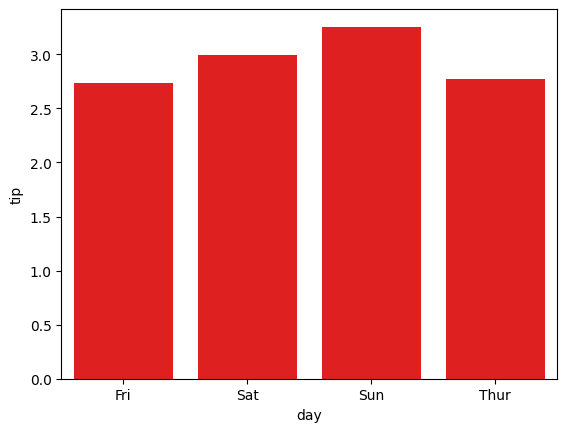

In [ ]:
ax = sns.barplot(x="day", y="tip", data=tip_por_dia, color="red")
plt.show()

Si intercambiamos los ejes (x e y), hacemos un gráfico de barra horizontal. Tambien podemos indicar el nombre de los ejes y el título

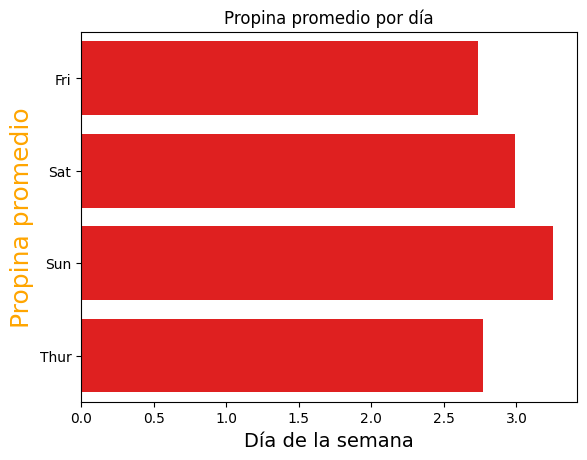

In [ ]:
ax = sns.barplot(y="day", x="tip", data=tip_por_dia, color="red")
ax.set_xlabel("Día de la semana", fontdict={"fontsize": 14})
ax.set_ylabel("Propina promedio", fontdict={"fontsize": 18, "color": "orange"})
ax.set_title('Propina promedio por día')
plt.show()

## Ver valor en barras

Para ver el barror en las barras. Desde la versión 3.4 de matplotlib se agregó una nueva función llamada `bar_label` para poder incluir el valor de las barras.

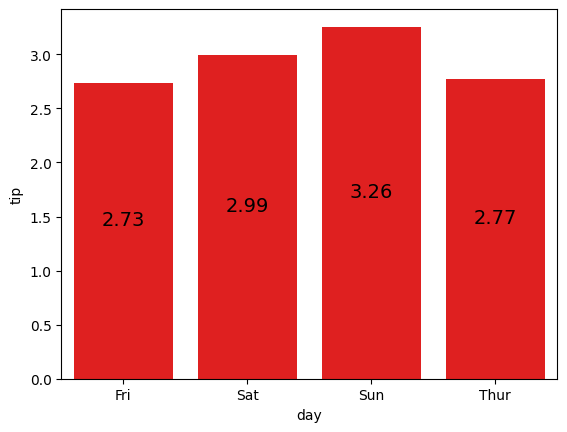

In [ ]:
ax = sns.barplot(x="day", y="tip", data=tip_por_dia, color="red")

# fmt='%.2f' -> 2 decimales
ax.bar_label(ax.containers[0], fmt='%.2f', label_type="center",
             padding=8, fontsize=14)

plt.show()

## Dejar a seaborn la agregación de información

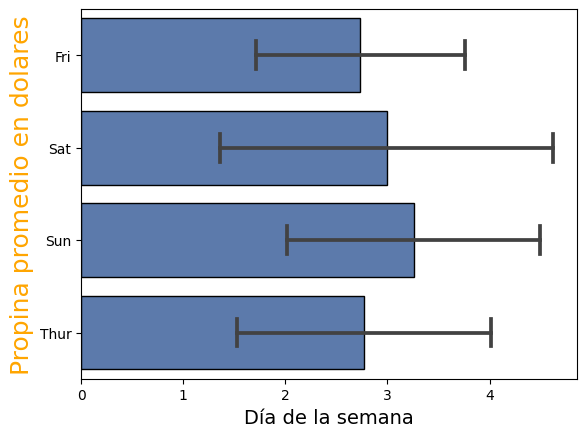

In [ ]:
ax = sns.barplot(y="day", x="tip", data=df, # Le damos el dataset original
                 # Definir orden de las barras
                 order=["Fri", "Sat", "Sun", "Thur"],
                 # Indicar que saque el promedio. Tambien se podría poner "sum" o "count"
                 estimator="mean",
                 # Agregar desviación estandar. Tambien puede ser None o ci para intervalos de confianza
                 errorbar="sd",
                 # Poner límites en la barra de desviación
                 capsize=.3,
                 # Color de la barra
                 color="#4f77b8",
                 # Color de los bordes
                 edgecolor="black"
                 )

ax.set_xlabel("Día de la semana", fontdict={"fontsize": 14})
ax.set_ylabel("Propina promedio en dolares", fontdict={"fontsize": 18, "color": "orange"})
plt.show()

# Gráfico de punto y de línea

In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("calories.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,day,calories,student
0,1,1403,a
1,2,1433,a
2,3,1375,a
3,4,1385,a
4,5,1436,a


Para poder graficar una sola serie de puntos (una observacion en cada momento en el tiempo) vamos a elegir a un alumno. En este caso al alumno `a`.

In [ ]:
student_a = df[df.student == 'a']
print(student_a)

   day  calories student
0    1      1403       a
1    2      1433       a
2    3      1375       a
3    4      1385       a
4    5      1436       a
5    6      1412       a
6    7      1362       a
7    8      1432       a
8    9      1380       a
9   10      1411       a


Grafiquemos los datos con seaborn
 * `marker="o"`: indicar cómo se va a marcar cada punto del gráfico.

Visitar https://matplotlib.org/stable/api/markers_api.html para ver más marcadores posibles

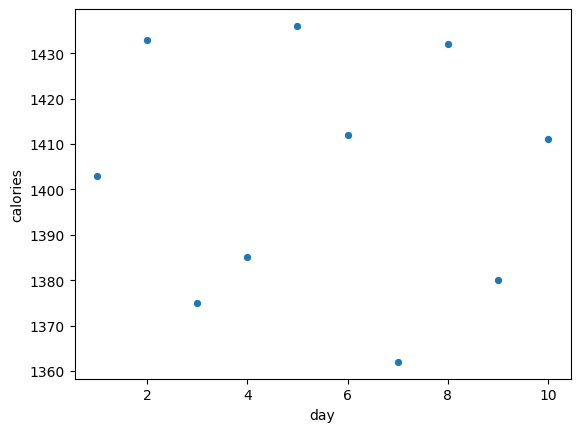

In [ ]:
ax = sns.lineplot(x="day", y="calories", data=student_a, linewidth=0, marker = 'o')
plt.show()

Si no especificamos marcador, se genera un gráfico de línea con Seaborn.

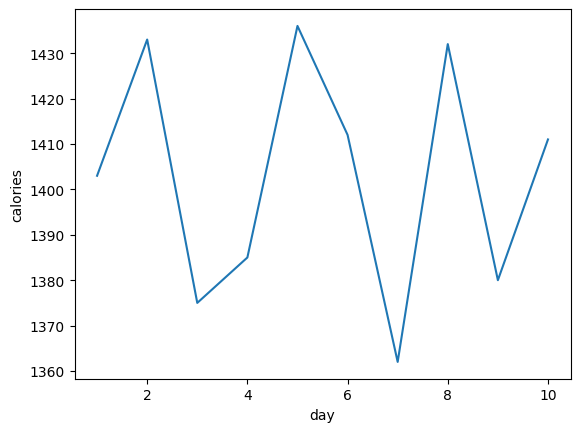

In [ ]:
ax = sns.lineplot(x="day", y="calories", data=student_a)
plt.show()

Tambien podemos hacer gráfico de múltiples líneas llamando varias veces a `sns.lineplot`

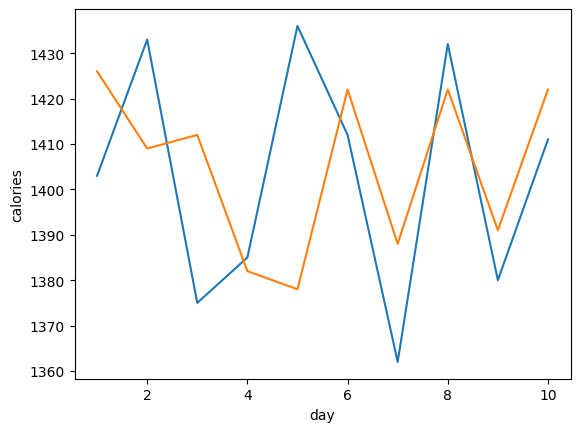

In [ ]:
ax = sns.lineplot(x="day", y="calories", data=df[df.student == 'a'])
ax = sns.lineplot(x="day", y="calories", data=df[df.student == 'b'])
plt.show()

O bien, usando el parámetro `hue` y la columna que determina dicha categoría.

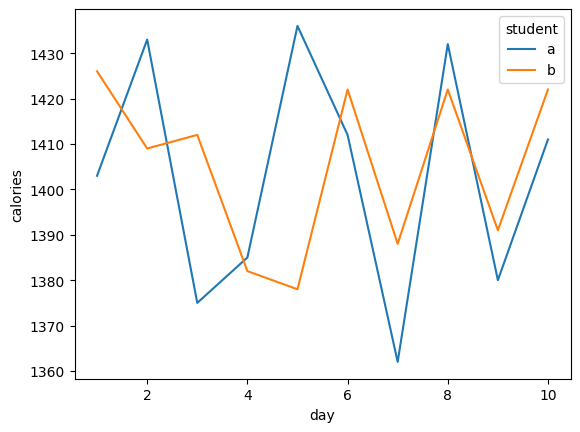

In [ ]:
dataset = df[df.student.isin(["a", "b"])]
ax = sns.lineplot(x="day", y="calories", data=dataset, hue="student")
plt.show()

Tambien podemos definir parámetros sobre la línea

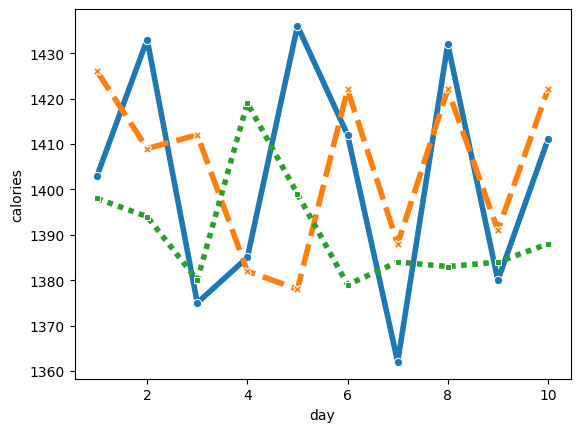

In [ ]:
df_small = df[df.student.isin(["a", "b", "c"])]
ax = sns.lineplot(x="day",
                  y="calories",
                  data=df_small,
                  hue="student",
                  # Ancho de línea
                  lw=4,
                  # Usar lineas punteadas
                  dashes=True,
                  # Tipo de línea punteada según valor de alguna columna
                  style="student",
                  # Incluir puntos en cada dato
                  markers=True,
                  # Incluir o no la leyenda
                  legend=False,
                  )

# Gráfico de dispersión

In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("tips.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Haremos un gráfico de dispersión donde:
* **El eje X** codifica el monto total de la cuenta en el restaurante
* **El eje Y** codifica la propina que se dio al mesero/a.

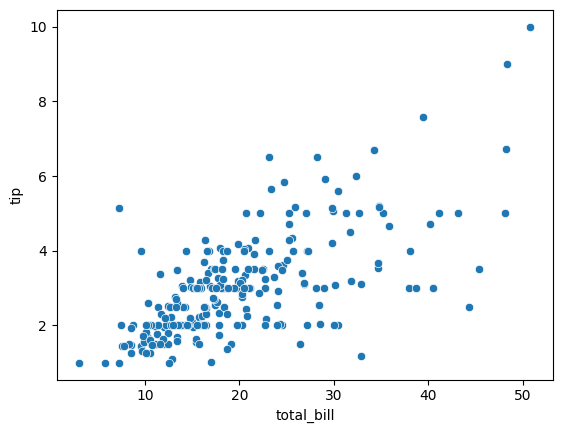

In [ ]:
ax = sns.scatterplot(x="total_bill", y="tip", data=df)
plt.show()

Podemos codificar varios atributos simulteneamente con un _bubblechart_ en Seaborn. Solo debemos utilizar más parámetros en la función de `scatterplot`.

* `size="size"` es para que el tamaño de los puntos está en función del tamaño de la mesa (cantidad de gente).
* `hue="time"` es para que el color ("hue") de los puntos está en función de la hora de la comida (cena o almuerzo).
* `sizes=(20,250)`es para indica en rango de tamaños para el círculo más pequeño y más grande. Se recomienda experimentar con este parámetro porque no se indica si aquellos números representan pixeles, milimetros, pulgadas, etc. Por lo tanto se debe probar para ver cómo resulta el gráfico.
* `cmap="Set1"` es para indicar qué paleta de colores utilizar.

Visitar https://matplotlib.org/stable/tutorials/colors/colormaps.html para ver las paletas de colores.

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


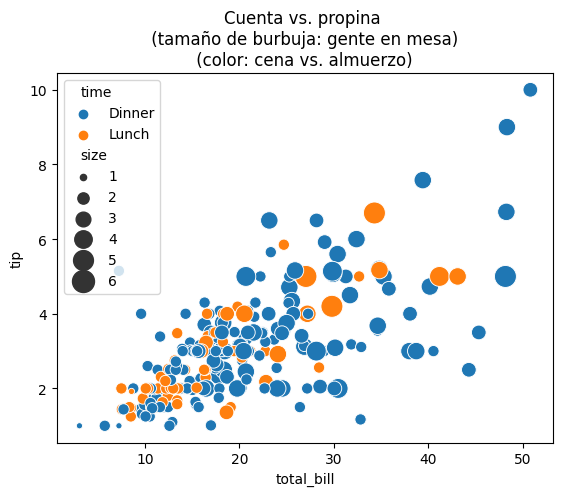

In [ ]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="time", size="size", sizes=(20, 250),
                     cmap = 'Set1', data=df)

ax.set_title('Cuenta vs. propina \n (tamaño de burbuja: gente en mesa) \n (color: cena vs. almuerzo) ')
plt.show()

# Histograma

In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("tips.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Visualizaremos la distribución de la variable tip con un histograma

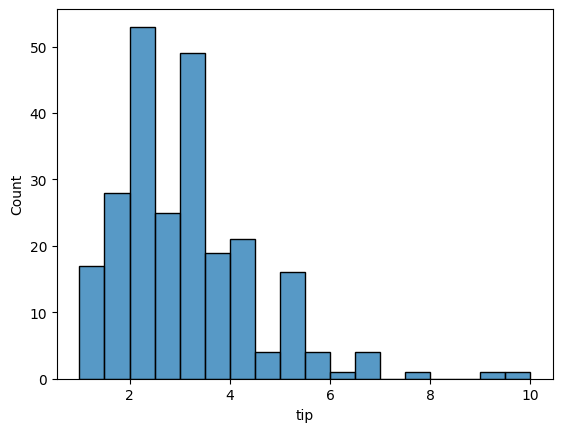

In [ ]:
ax = sns.histplot(df.tip)
plt.show()

Tal vez queremos ver la curva de probabilidad. Para esto usamos el atributo `kde=True`. Además queremos ver 2 distribuciones simulteneamente, así que llamamos 2 veces a `sns.histplot` y a cada una le definimos un `label` para que cuando hagamos `ply.legend()`, matplotlib sepa como se llama cada color en la leyenda.

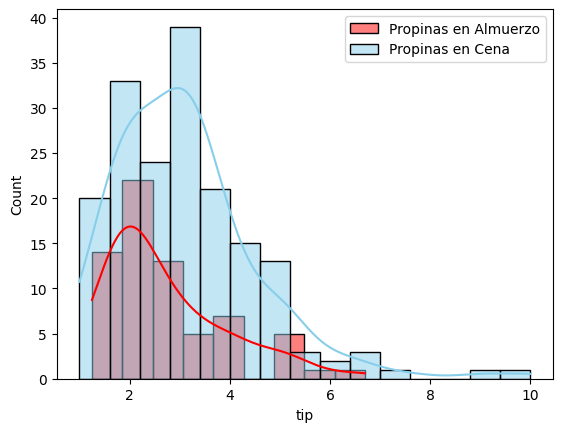

In [ ]:
sns.histplot(df[df.time == "Lunch"].tip, kde=True, color="red", label="Propinas en Almuerzo")
sns.histplot(df[df.time == "Dinner"].tip, kde=True, color="skyblue", label="Propinas en Cena")
plt.legend()
plt.show()

# Gráfico de Caja

In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("tips.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Visualizaremos la distribución de la variable tip (propina) con un gráfico de caja.

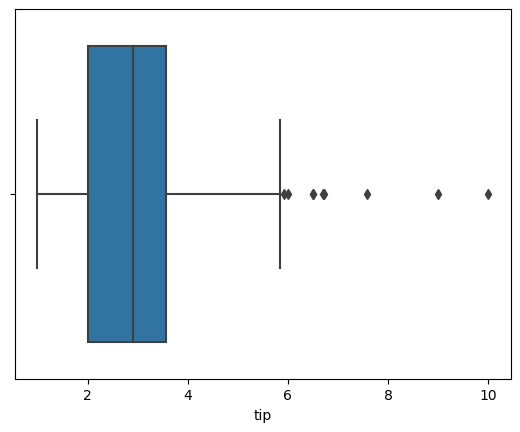

In [ ]:
ax = sns.boxplot(x=df.tip)
plt.show()

para forzar que quede horizontal solo cambiamos el `x` por `y`. Luego, para cambiar el color se usan el argumento `color="red"`.

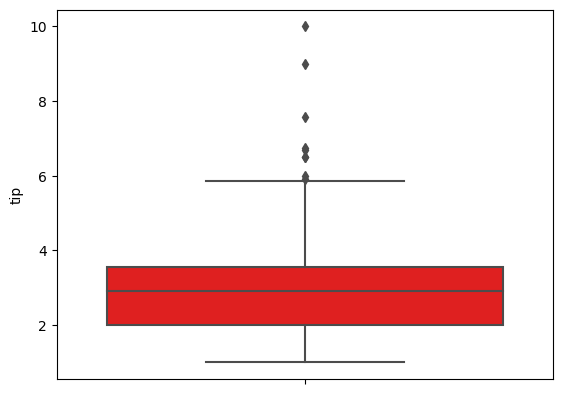

In [ ]:
ax = sns.boxplot(y=df.tip, color="red")
plt.show()

Ahora veamos si cambian según el día de la semana, y cambiemos la paleta de colores por defecto a `Set3`

Visitar https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html para ver las paletas de colores.

La orientación del gráfico (horizontal o vertical) se ajustará según el eje donde indiquemos la columna con **datos cuantitativos**.


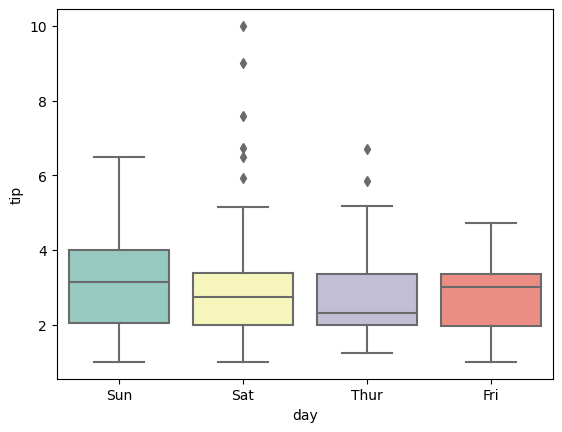

In [ ]:
ax = sns.boxplot(x="day", y="tip", data=df, palette="Set3")
plt.show()

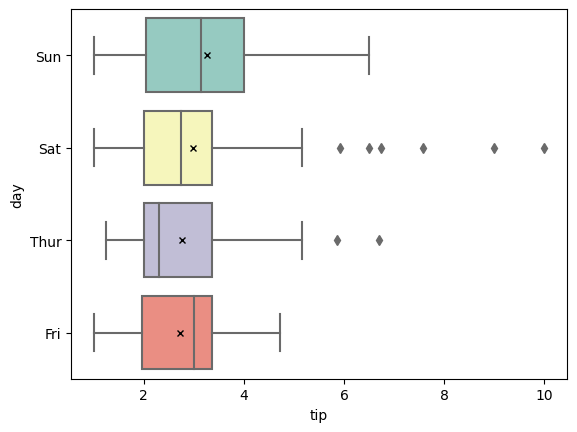

In [ ]:
meanprops={"marker":"x", "markerfacecolor":"white",
           "markeredgecolor":"black","markersize":"5"}

ax = sns.boxplot(x="tip", y="day", data=df, palette="Set3",
                 showmeans=True, meanprops=meanprops)
plt.show()

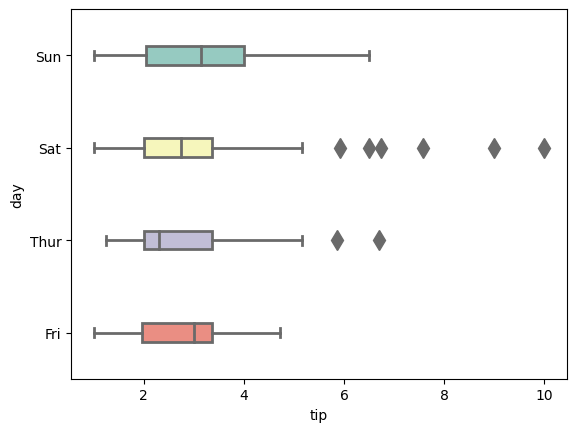

In [ ]:
ax = sns.boxplot(y="day",
                 x="tip",
                 data=df,
                 palette="Set3",
                 width=0.2,
                 #### Otros parámetros
                 fliersize=10, # 0 si queremos eliminar los outlier
                 linewidth=2,
                 # Espacio entre la caja y el extremo de la línea. Lo normal es 1.5
                 whis=1.5,
                 )

# Gráfico de Violín



In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("tips.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


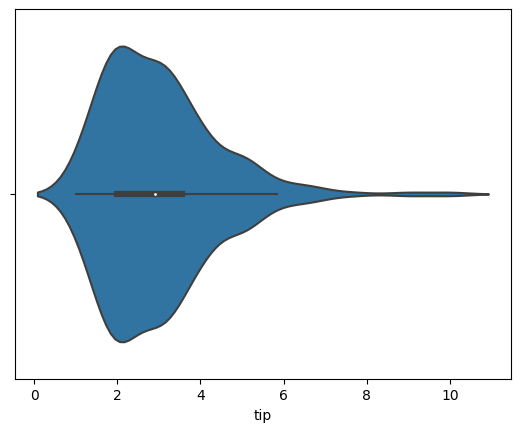

In [ ]:
ax = sns.violinplot(x=df.tip)
plt.show()

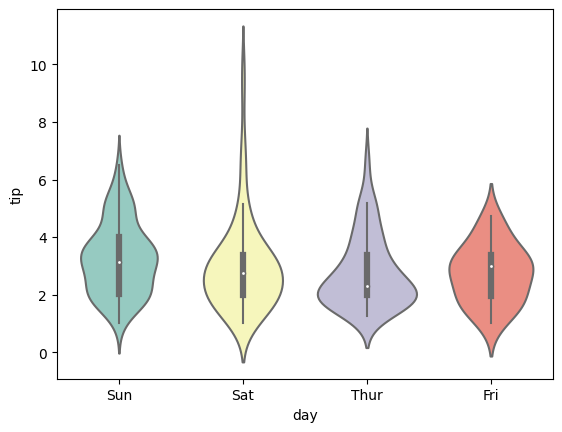

In [ ]:
ax = sns.violinplot(x="day", y="tip", data=df, palette="Set3")
plt.show()

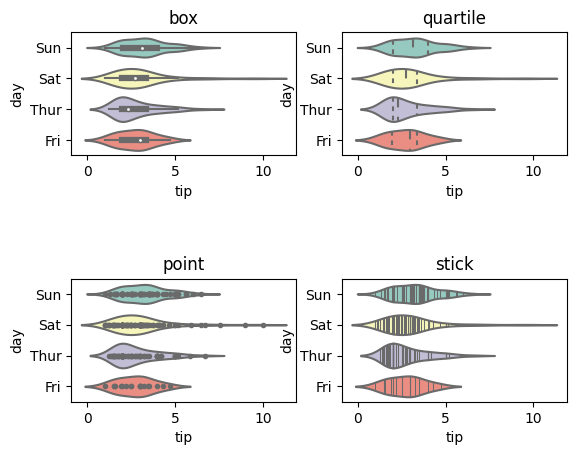

In [ ]:
fig, axs = plt.subplots(2, 2)
options = ["box", "quartile", "point", "stick"]
axis = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]

i = 0
for option in options:
    sns.violinplot(x="tip", y="day", data=df, palette="Set3",
                   inner=options[i], ax=axis[i])
    axis[i].set_title(options[i])
    i+= 1

plt.subplots_adjust(hspace=1)
plt.show()

# Gráfico de Torta

In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("recipe.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,ingredientes,gramos
0,Harina,375
1,Azucar,75
2,Mantequilla,250
3,Berries,300


Se crea un gráfico de torta con el método `pie` y se le entrega la lista de valores.

Esta función retorna una lista con los diferentes objetos presentes en la visualización. Lo importante es el  primer elemento de la lista que corresponde a cada segmento circular. En este caso, son 4 segmentos (1 por ingrediente).

Luego se agrega la leyenda. Para esto se usa `plt.leyend` y se le entrega la lista de cada segmento circular y una lista de _strings_ que será el nombre asignado a cada elemento. Además le podemos dar un título a la leyenda.

Finalmente se asigna un título al gráfico.


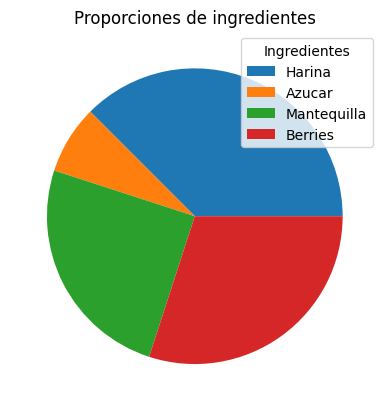

In [ ]:
pie_plot = plt.pie(df["gramos"])
plt.legend(pie_plot[0], df["ingredientes"], title="Ingredientes")
#Se asigna un título al gráfico
plt.title("Proporciones de ingredientes")
plt.show()

Ahora veremos el caso donde necesitamos calcular la proporción de algún dato.

In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("tips.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Primero agrupamos por una columna y contamos cuantos datos por valor distinto de dicha columna hay.

In [ ]:
new_df = df.groupby("sex").size()
new_df.head()

sex
Female     87
Male      157
dtype: int64

Luego, se crea un gráfico de torta con el mismo método de antes, solo que esta vez le entregamos directamente el _dataset_ luego de agrupar.

Posteriormente, se agrega la leyenda que nuevamente le entregamos los segmentos circulares entregados por `plt.pie` y el segundo argumento es el índice del _dataset_ agrupado. `new_df.index` contiene el nombre asociado a cada segmento circular.

Finalmente asignamos título a la leyenda y al gráfico.


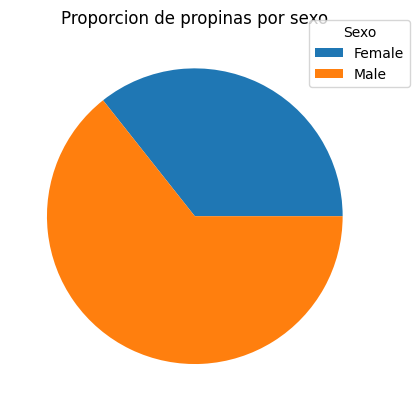

In [ ]:
# bbox_to_anchor permite mover la legenda de posición
pie_plot = plt.pie(new_df)
plt.legend(pie_plot[0], new_df.index, title="Sexo",
           bbox_to_anchor=(1.1, 1.05))
plt.title("Proporcion de propinas por sexo")
plt.show()

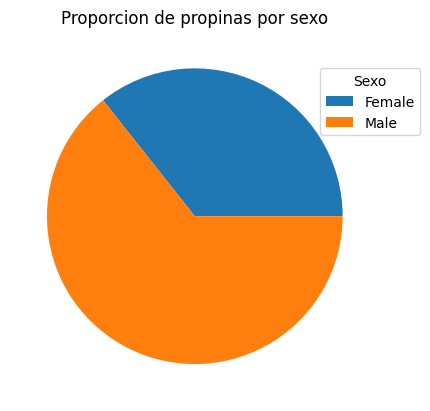

In [ ]:
# bbox_to_anchor permite mover la legenda de posición
pie_plot = plt.pie(new_df)
plt.legend(pie_plot[0], new_df.index, title="Sexo",
           bbox_to_anchor=(0.82, 0.7))
plt.title("Proporcion de propinas por sexo")
plt.show()

También podemos personalizar más el gráfico de torta

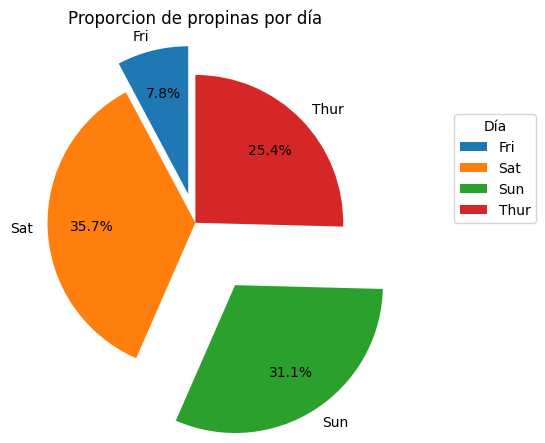

In [ ]:
new_df = df.groupby("day").size()
pie_plot = plt.pie(new_df,
                   labels=new_df.index,
                   autopct='%1.1f%%', # Ver texto
                   explode=[0.2, 0, 0.5, 0], # Angulo de salida de cada sector
                   startangle=90, # Angulo de inicio
                   pctdistance=0.7, # Distancia del texto (porcentaje) con el centro
                   radius=1 # Tamaño
                   )

plt.legend(pie_plot[0], new_df.index,
           title="Día",
           loc=(1.2, 0.5)) # Con Loc uno puede jugar con la posición de la legenda

#Se asigna un título al gráfico
plt.title("Proporcion de propinas por día", pad=10)

plt.show()

# Matriz de Gráficos

In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("iris.csv")

# Utilizar la función read_csv para cargar el archivo
df_2 = pd.read_csv("tips.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Con [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) se crea la matriz y específica sus dimensiones a partir del _dataset_.
- `col="day"` para que en las columnas iran los valores del atributo `day`.
- `row="time" para que en las filas iras los valores del atributo `time`.

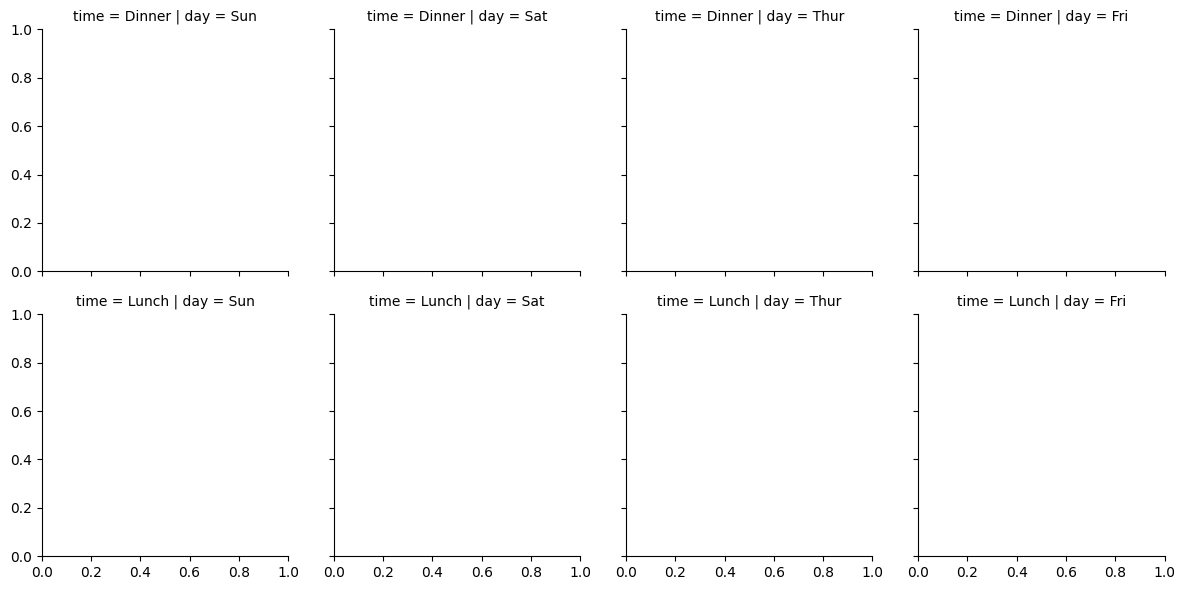

In [ ]:
g = sns.FacetGrid(df_2, col="day", row="time")
plt.show()

Ahora vamos a llegar cada espacio de la grilla. Para eso uamos el método `map`. Primero le debemos indicar la función que permie generar el gráfico, en este caso `plt.scatter`.

El resto de los argumentos corresponden a los atributos propios del gráficos de dispersión correspondiente `total_bill` en el **eje X**, y `tip` en el **eje Y**.


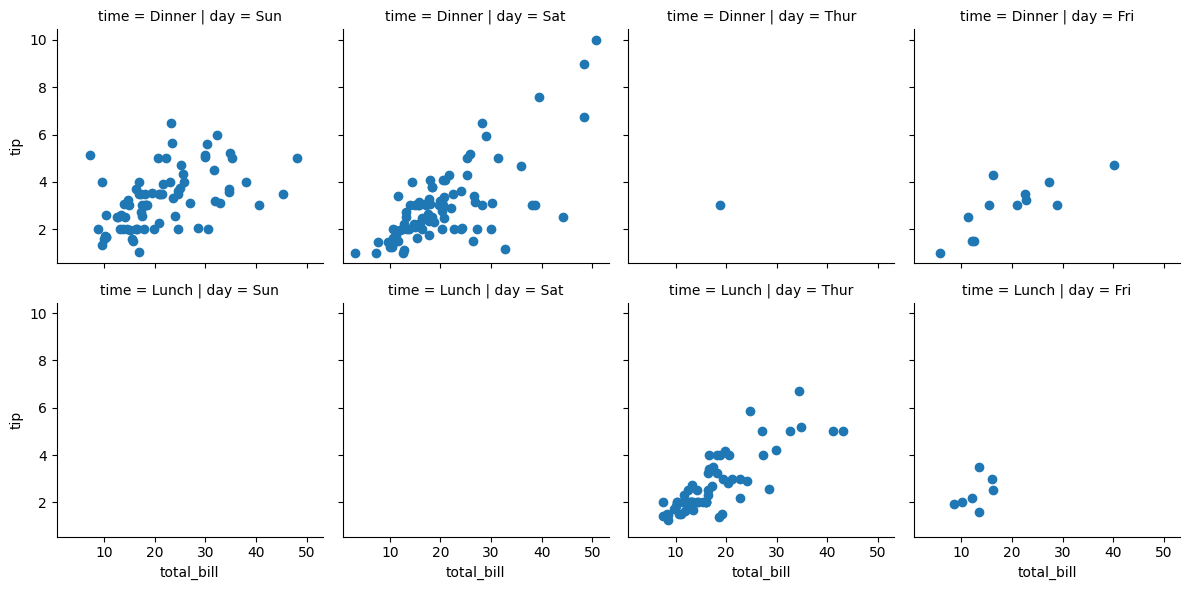

In [ ]:
g = sns.FacetGrid(df_2, col="day", row="time")
g.map(plt.scatter, "total_bill", "tip")
plt.show()

Tambien existen otras formas de hacer matrices de gráfico. Por ejemplo con [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html). En este caso:
- `x="total_bill` e `y="tip"` para indicar qué atributos se usarán en cada eje.
- `col="smoker"` y `row="sex"` se ocupan a igual que en FacetGrid para indicar como dividir los datos en filas y columnas.
- `data=df_2` es para indicar de donde provienen los datos.

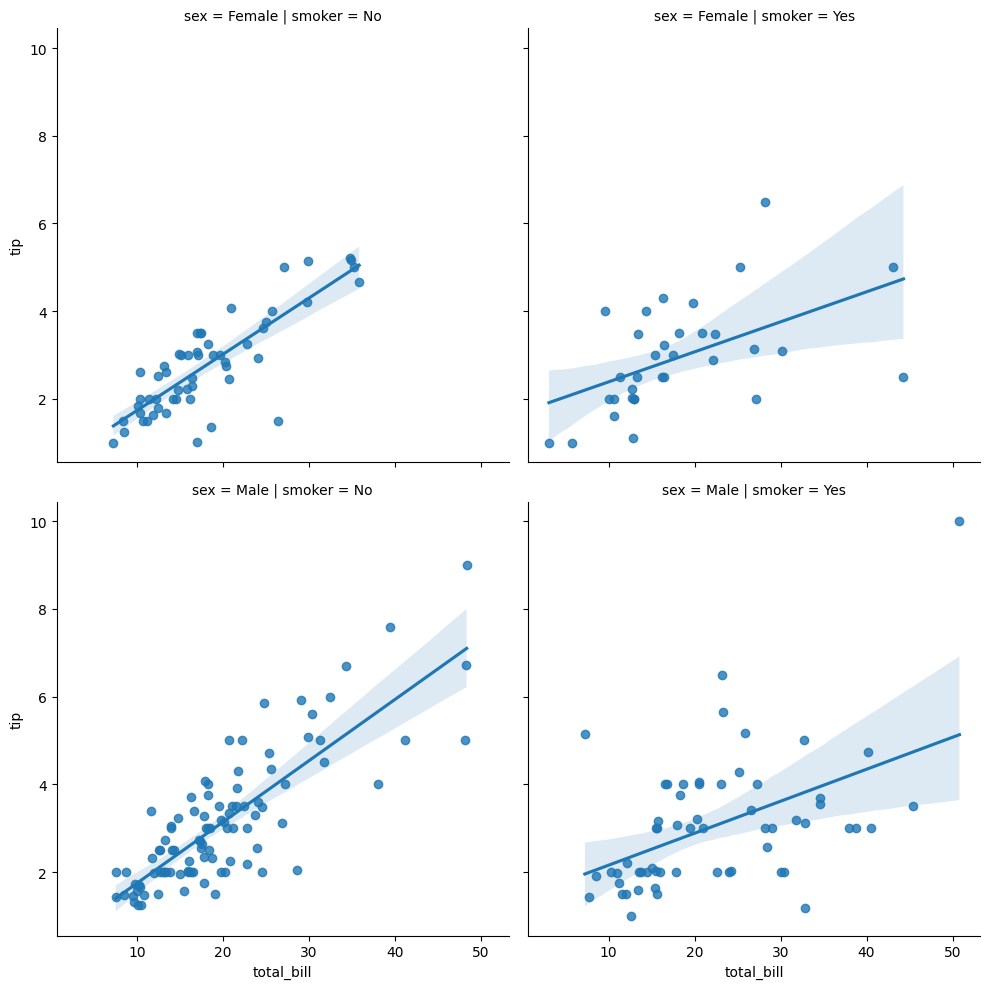

In [ ]:
g = sns.lmplot(x="total_bill", y="tip", col="smoker", row="sex", data=df_2)
plt.show()

Tambien podemos usar [`sns.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) para hacer una matriz donde cada gráfico es una combinación distinta de pares de atributos numéricos.

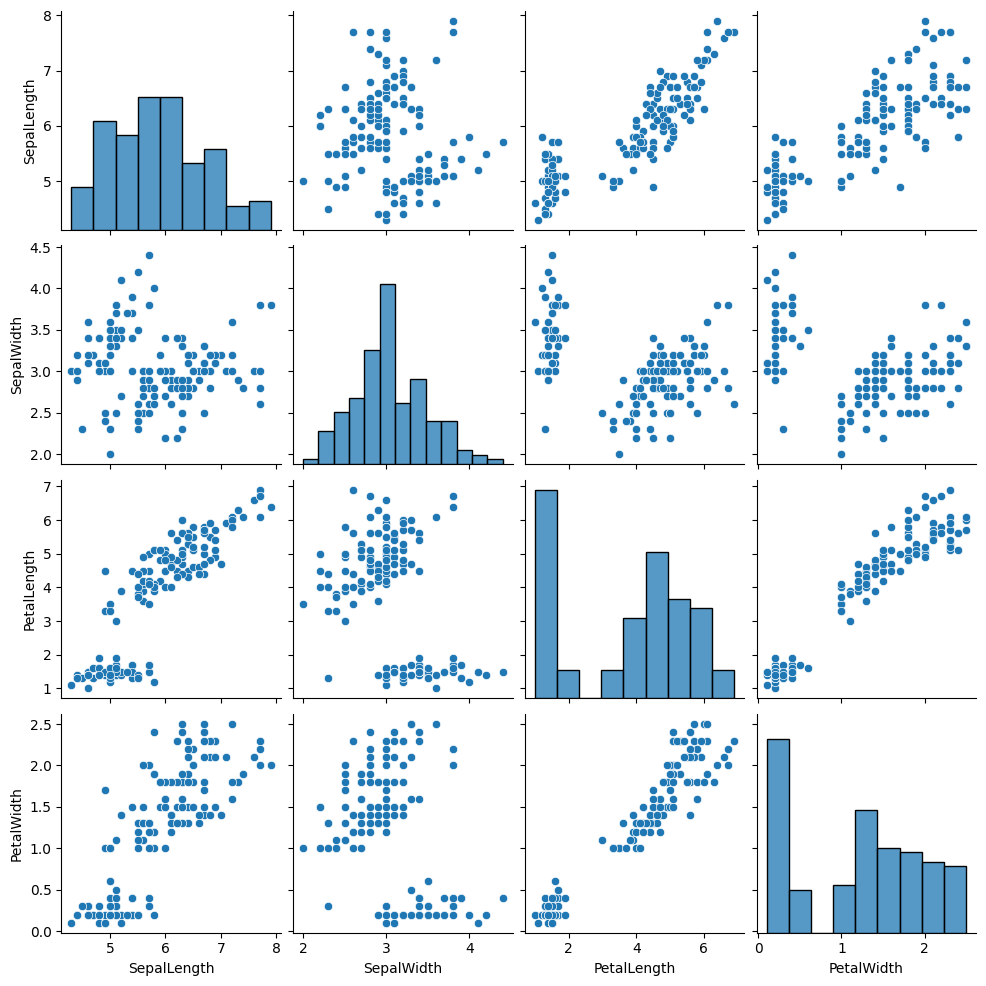

In [ ]:
g = sns.pairplot(df)
plt.show()

Como la matriz generalmente es simetrica, podemos ahorrarnos una mitad con el parámetro `corner` y personalizar más codificación usando tonalidad de color (`hue`) y cambio de paleta (`palette`)

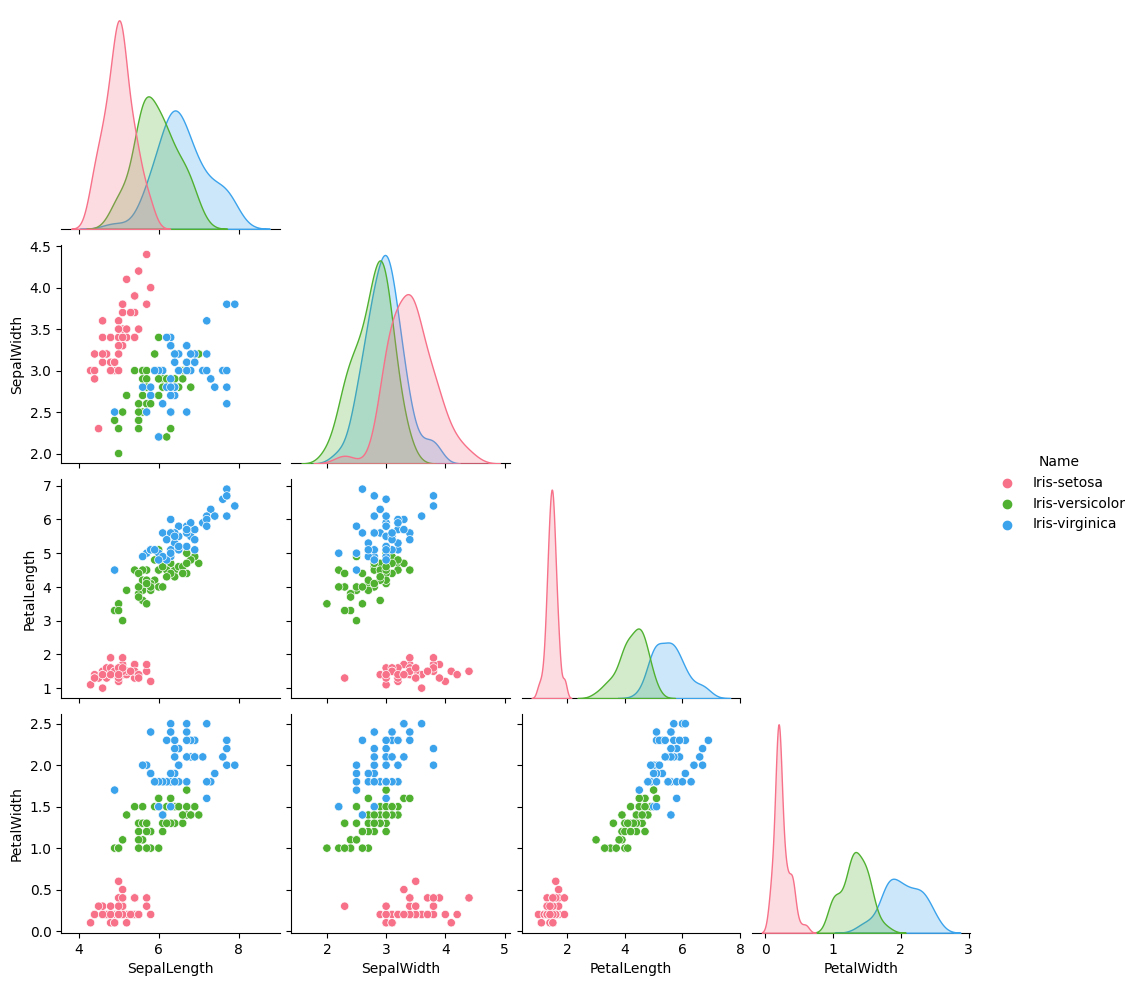

In [ ]:
g = sns.pairplot(df, hue="Name", palette="husl", corner=True)
plt.show()

Tal vez no se requiere ver todas las combinaciones de variables. Se pueden específicar en `x_vars` e `y_vars` las variables a cruzar.

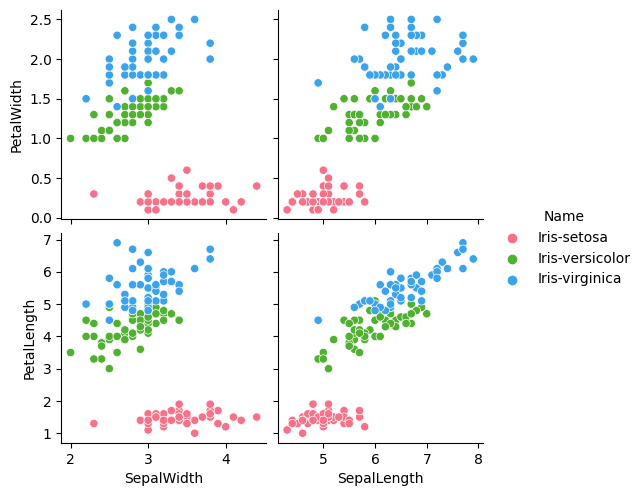

In [ ]:
g = sns.pairplot(df, hue="Name", palette="husl",
                 x_vars=["SepalWidth", "SepalLength"],
                 y_vars=["PetalWidth", "PetalLength"])
plt.show()

Podemos definir qué tipo de visualización será la diagonal, el tamaño de cada gráfico y el tipo de los demás gráficos.

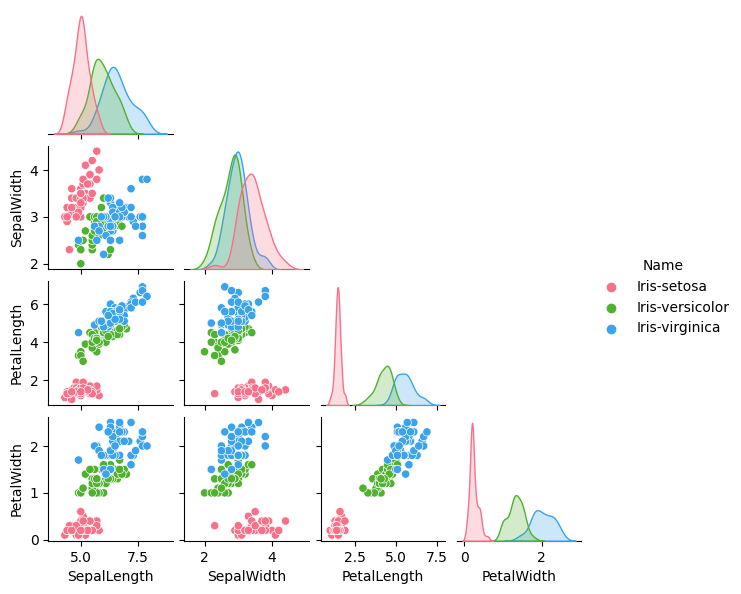

In [ ]:
g = sns.pairplot(df, hue="Name", palette="husl", corner=True,
                 diag_kind="kde", height=1.5, kind="scatter")
plt.show()

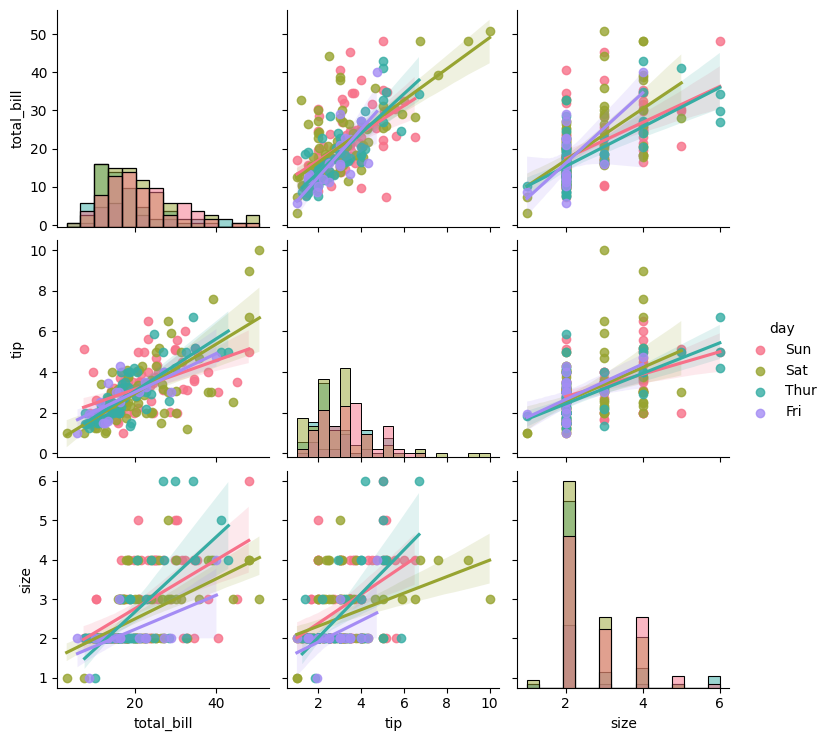

In [ ]:
g = sns.pairplot(df_2, hue="day", palette="husl",
                 kind="reg", diag_kind="hist")

# Pequeños Multiples

In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("calories.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,day,calories,student
0,1,1403,a
1,2,1433,a
2,3,1375,a
3,4,1385,a
4,5,1436,a


Para hacer esta visualización, pimero generamos una grilla en donde los argumentos son:
- `data=df`: indicar de donde provienen los datos
- `col="student"`: indicar qué columna utilizar para definir cuantos gráficos hay
- `hue="student"`: indicar qué columna utilizar para definir los colores de cada gráfico
- `col_wrap=3`: indicar cuantas columnas pueden haber.

Importante recoerdar que esta función solo genera los gráficos sin datos, ahora falta indicar con qué llenar cada gráfico. Para esto usamos el método `map` cuyos argumentos son:

- `plt.plot`: indicar la forma con la que se llenará cada gráfico.  Para este curso, puede ser `plt.plot` para gráfico de línea o `plt.scatter` para gráfico de dispersión.
- `"day"`: indicar qué columna utilizar como coordenada en el eje X.
- `"calories"`: indicar qué columna utilizar como coordenada en el eje Y.
- `marker=""`: indicar cómo se va a marcar cada punto del gráfico. En este caso, no se marcará.

Visitar https://matplotlib.org/3.1.3/api/markers_api.html para ver más marcadores posibles


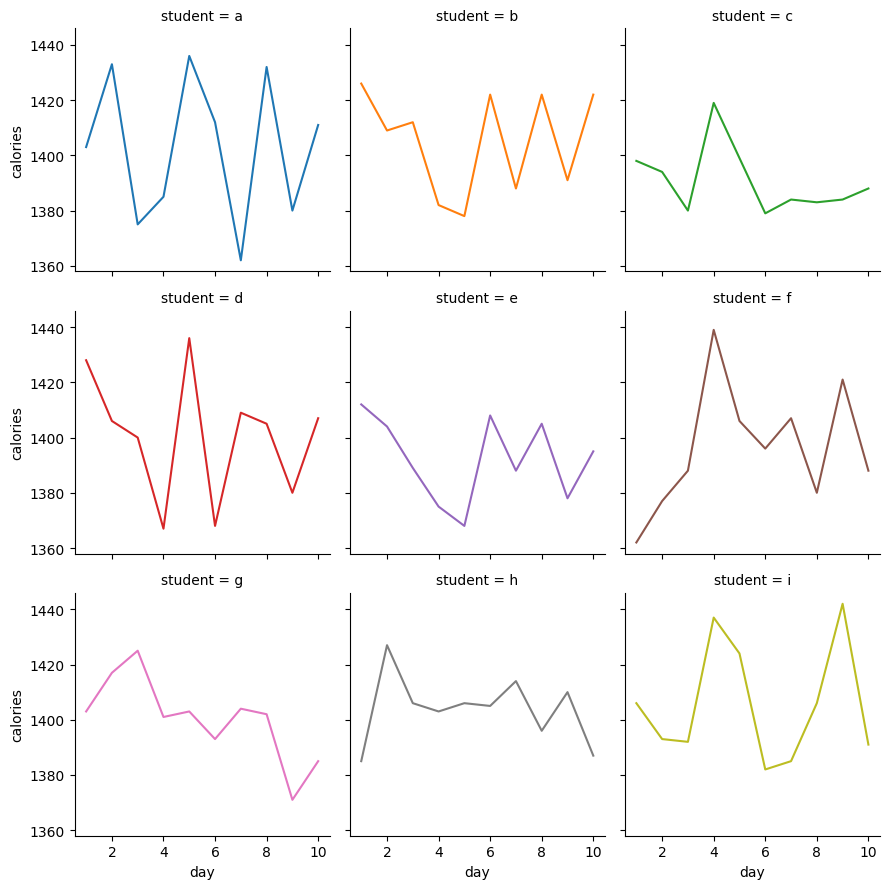

In [ ]:
grid = sns.FacetGrid(data=df, col="student", hue="student", col_wrap=3)
grid.map(plt.plot, "day", "calories", marker="")
plt.show()

Ahora vamos a mostrar ejemplos donde modificamos el rango del eje Y que muestran los gráficos. Para esto, solo basta definir `y_lim`  en `FacetGrid` para delimiar los límites en el eje Y.

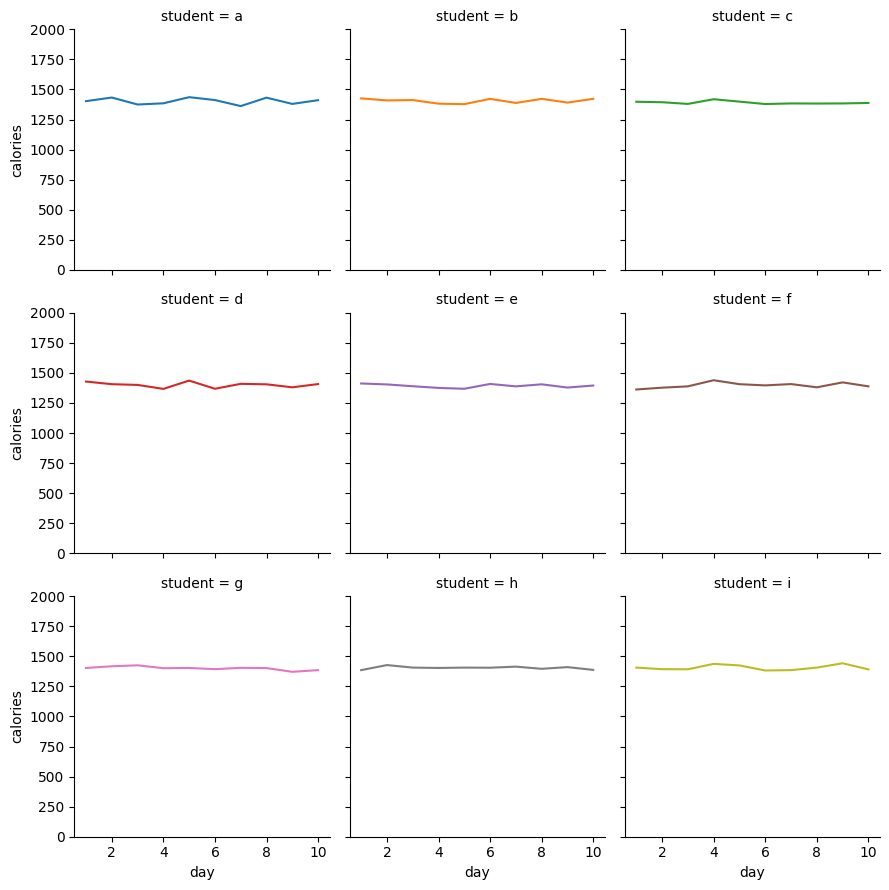

In [ ]:
grid = sns.FacetGrid(data=df, col="student", hue="student", col_wrap=3, ylim=(0, 2000))
grid.map(plt.plot, "day", "calories", marker="")
plt.show()

¿Y si queremos modificar el rango del eje Y de algunos gráficos?
1. En el `FacetGrid` incluimos `sharedy=False` para indcar que los límites por gráfico no serán todos iguales. Así podemos modificar cada uno de forma independiente.
2. Luego de llamar al método `map`, escribimos `grid.axes[N].set_ylim(A, B)` para indicar que el eje Y del gráfico `N` estará entre `A` y `B`.

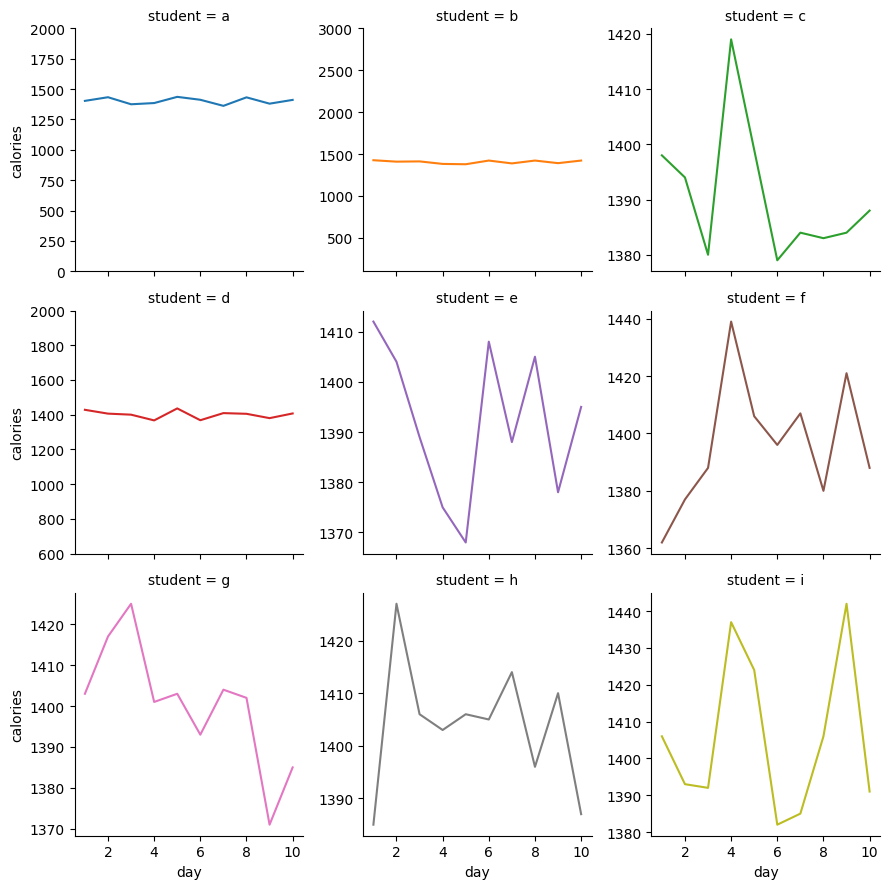

In [ ]:
grid = sns.FacetGrid(data=df, col="student", hue="student", col_wrap=3, sharey=False)
grid.map(plt.plot, "day", "calories", marker="")

grid.axes[0].set_ylim(0, 2000) # Modificamos el primer gráfico
grid.axes[1].set_ylim(100, 3000) # Modificamos el segundo gráfico (student=b)
grid.axes[3].set_ylim(600, 2000) # Modificamos el segundo gráfico (student=d)

plt.show()

Seaborn tiene otra forma rápida de crear _small multiple_ con `relplot` (así no usamos `grid` y `map`): https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

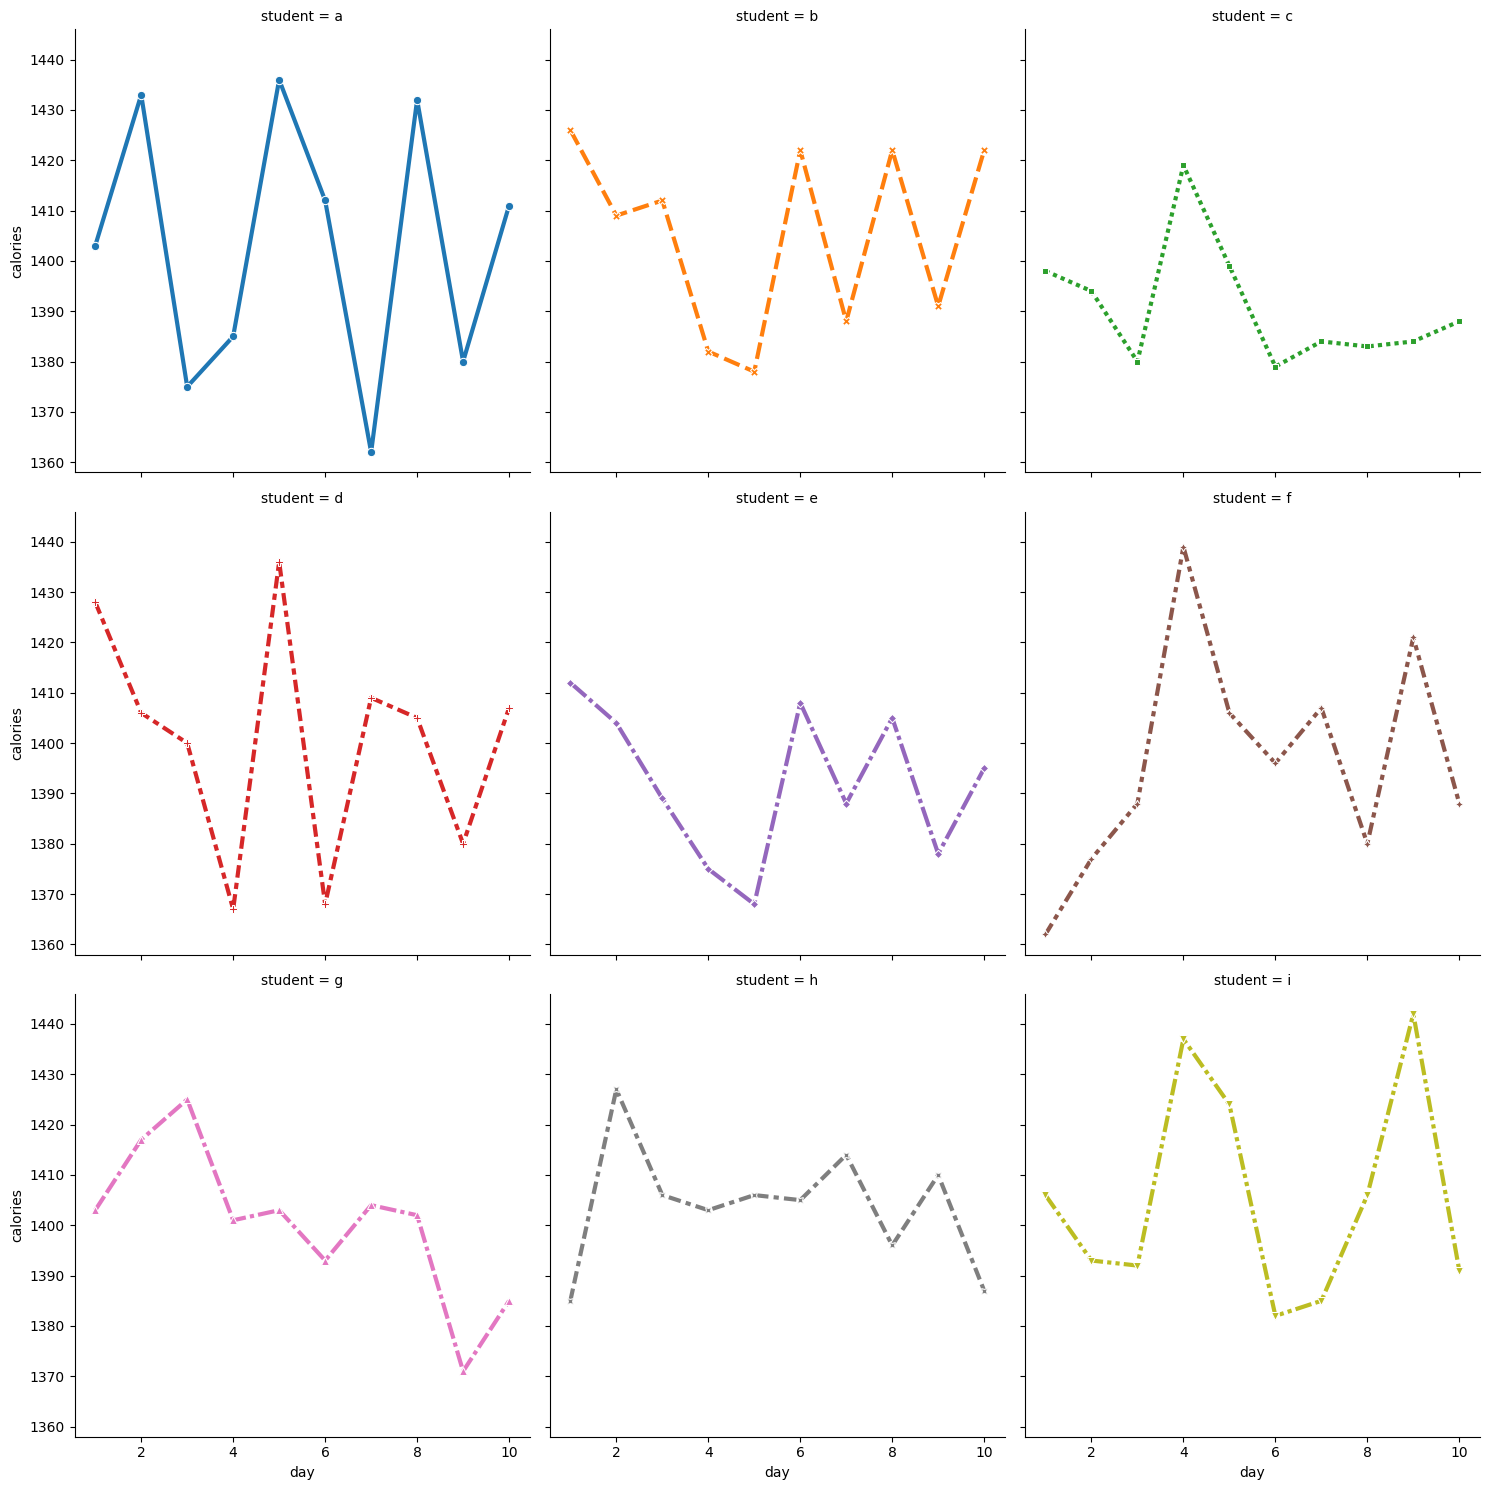

In [ ]:
ax = sns.relplot(x="day",
                 y="calories",
                 data=df,
                 hue="student",
                 lw=3,
                 style="student",
                 dashes=True,
                 markers=True,
                 legend=False,
                 # 3 argumentos que necesita relplot
                 col_wrap=3,
                 kind="line",
                 col="student")

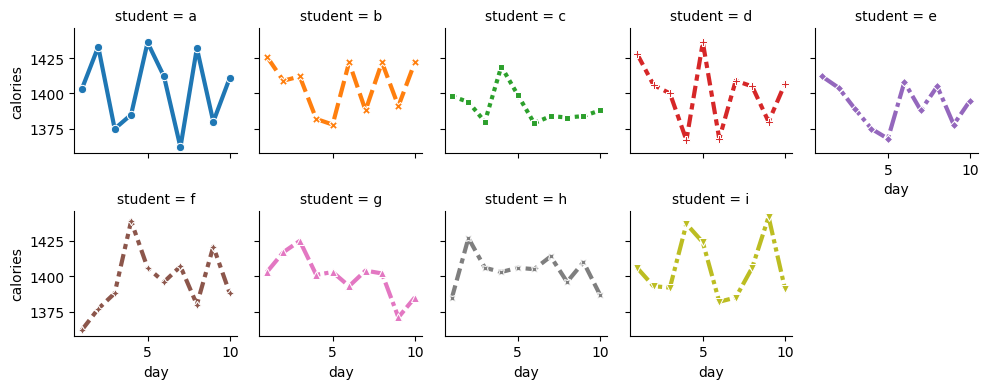

In [ ]:
ax = sns.relplot(x="day",
                 y="calories",
                 data=df,
                 hue="student",
                 lw=3,
                 style="student",
                 dashes=True,
                 markers=True,
                 legend=False,
                 # 3 argumentos que necesita relplot
                 col_wrap=5,
                 kind="line",
                 col="student",
                 # un argumento opcional
                 height=2)

## _Small múltiple_ de multiínea

¿Y si necesito varias líneas por gráfico?. Primero vamos a generar algunos datos más para simular este caso.

In [ ]:
import random

df_v2 = df.copy()

df_v2["calories_V2"] = df_v2["calories"].apply(lambda x:x*random.random())
df_v2.head()

,day,calories,student,calories_V2
0,1,1403,a,132.872372
1,2,1433,a,29.338360
2,3,1375,a,16.864304
3,4,1385,a,1303.956625
4,5,1436,a,914.165629


Luego usamos la función [`melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) de pandas para convertir el _dataset_ en un formato donde tengamos únicamente 1 columna numérica.

In [ ]:
df_v2_convertido = df_v2.melt(id_vars=["day", "student"], value_name="value", var_name="column")
df_v2_convertido.sample(10)

,day,student,column,value
0,1,a,calories,1403.000000
171,2,i,calories_V2,187.724979
165,6,h,calories_V2,646.410198
72,3,h,calories,1406.000000
163,4,h,calories_V2,1032.882482
61,2,g,calories,1417.000000
19,10,b,calories,1422.000000
51,2,f,calories,1377.000000
37,8,d,calories,1405.000000
142,3,f,calories_V2,1345.556095


Ahora solo basta usar el parámetro `hue="column"` para indicar a Seaborn qué columna del _dataset_ utilizar para segmentar las líneas y definir los colores. Adicionalmente agregamos 2 parámetros más:
- `height=2` para indicar la atura, en pulgadas, de cada gráfico.
- `aspect=1.5` para indicar la relación de aspecto de cada gráfico. De este modo, `aspect * height` nos dará el ancho, el pulgadas, de cada gráfico.

Cómo ahora tendremos varias líneas, incluimos `grid.add_legend()` para agregar la leyenda en la visualización.


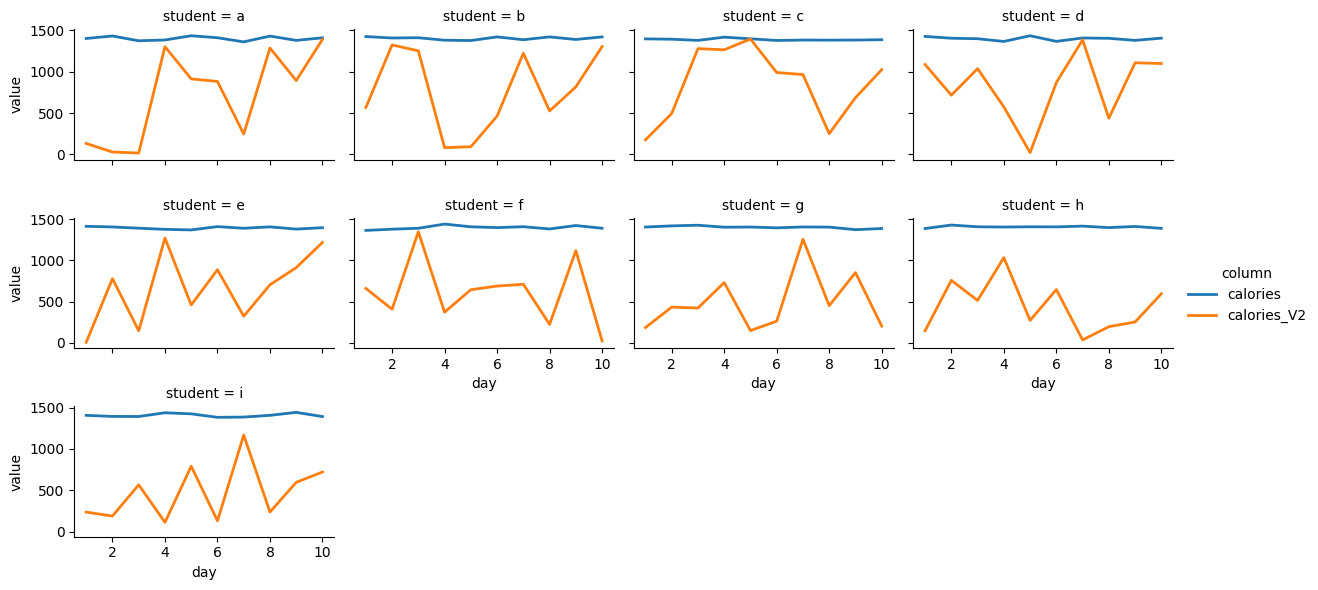

In [ ]:
grid = sns.FacetGrid(data=df_v2_convertido, col="student", hue="column",
                     col_wrap=4, height=2, aspect=1.5)

grid.map(plt.plot, "day", "value", marker="", linewidth=2)
grid.add_legend()

plt.show()

Y podemos hacer lo mismo con `relplot`

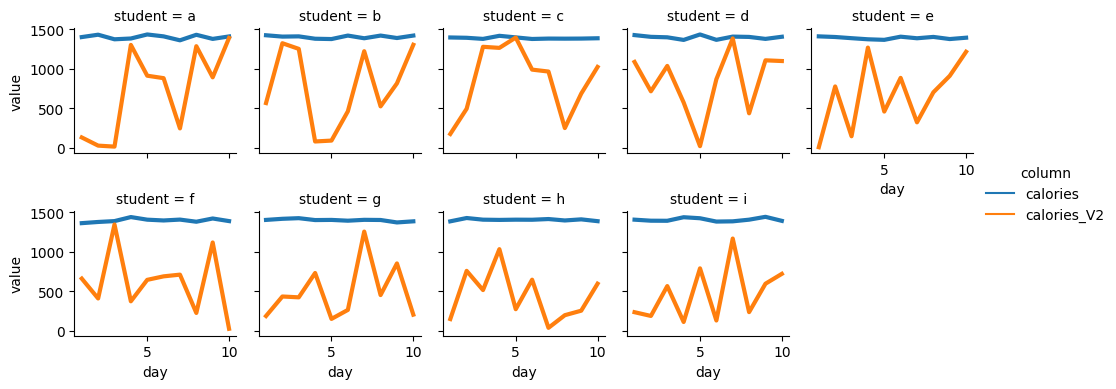

In [ ]:
ax = sns.relplot(x="day",
                 y="value",
                 data=df_v2_convertido,
                 hue="column",
                 lw=3,
                 legend=True,
                 col_wrap=5,
                 kind="line",
                 col="student",
                 # un argumento opcional para definir tamaño
                 height=2)

# Mapa de calor

In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("flights.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Usamos la función [`pivot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html) para indexar el dataset en un formato matríz (Notar que con Altair necesitamos el dataset con el formato anterior, pero con Seaborn no es así).

In [ ]:
df = df.pivot(index="year", columns="month", values="passengers")
df.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237


[`sns.heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) recibe el _dataset_ indexado y crea inmediatamente el _heatmap_.


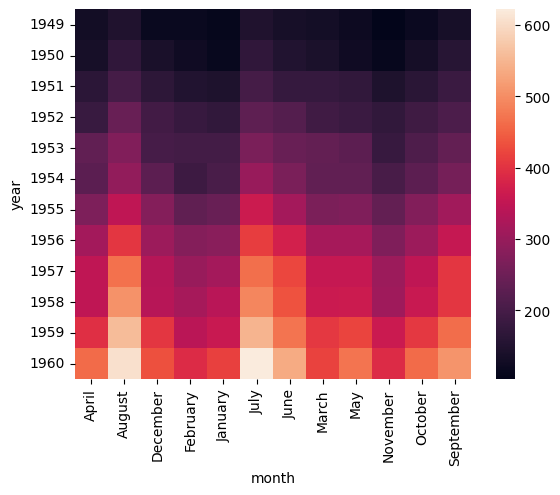

In [ ]:
ax = sns.heatmap(df)
plt.show()

El tamaño de este gráfico lo podemos personalizar indicando el tamaño de la figura a matplotlib con `plt.rcParams['figure.figsize']`.

Luego, podemos personalizar nuestro _heatmap_ con diferentes argumentos:

- `annot=True`: específica si se escribe o no el valor en la celda.
- `fmt="d"`: específica el formato de escritura del valor (d para valores enteros).
- `annot_kws={'size:10'}`: específica argumentos para el texto de las anotaciones, como el tamaño.
- `cmap='coolwarm'`: para la secuencia de colores. En este caso la paleta es `coolwarm` que es una paleta divergente.
- `linewidths=.5`: para marcar espaciado entre las celdas.
- `center=200` para indicar el centro de la divergencia **solo si se ocupa una paleta divergente**. [Aquí](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) puede encontrar información de las paletas disponibles.


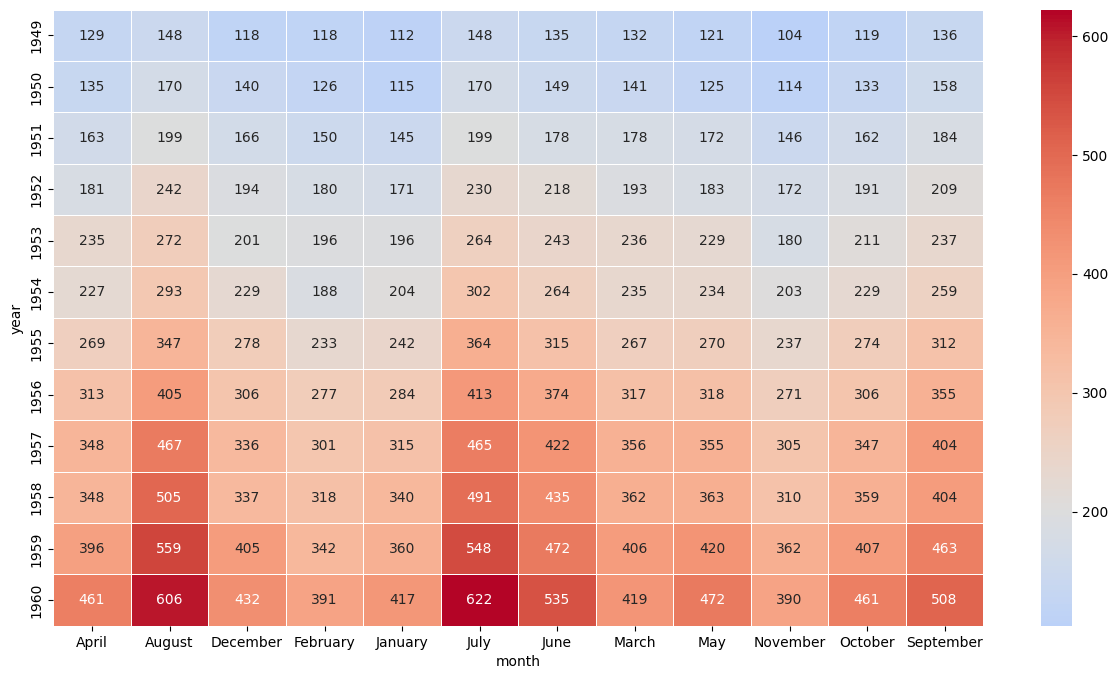

In [ ]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)  # Ancho, altura en pulgadas.

ax = sns.heatmap(df, annot=True, fmt="d", annot_kws={'size':10}, cmap='coolwarm',
                 linewidths=.5, center=200)
plt.show()

Si quieres que algún eje tenga un orden específico, se puede hacer lo siguiente.

- Para el caso de las **columnas**: se seleccionan las columnas en el orden que uno desea.

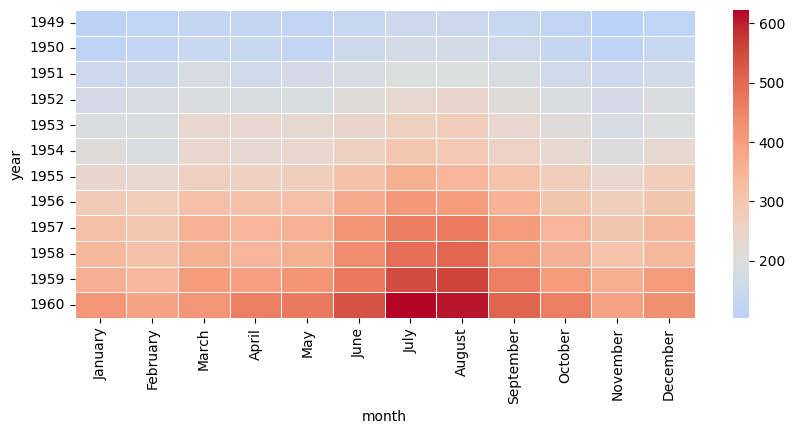

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 4.0)  # Ancho, altura en pulgadas.
df_order = df[['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']]
ax = sns.heatmap(df_order, cmap='coolwarm', linewidths=.5, center=200)
plt.show()

- Para el caso de las **filas**: la forma más rápida es usar `.T` para transponer la matriz, así las filas se convierten en columnas. Luego seleccionan como se dijo en el método anterior y se vuelve a hacer `.T` para dejar las columnas como filas.

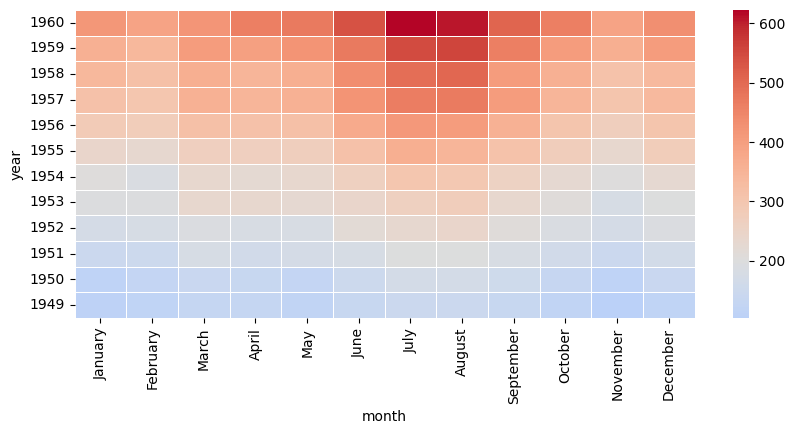

In [ ]:
df_order = df[['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']]
df_order = df_order.T[[1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949]].T
ax = sns.heatmap(df_order, cmap='coolwarm', linewidths=.5, center=200)
plt.show()

# Bonus


In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("iris.csv")

df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

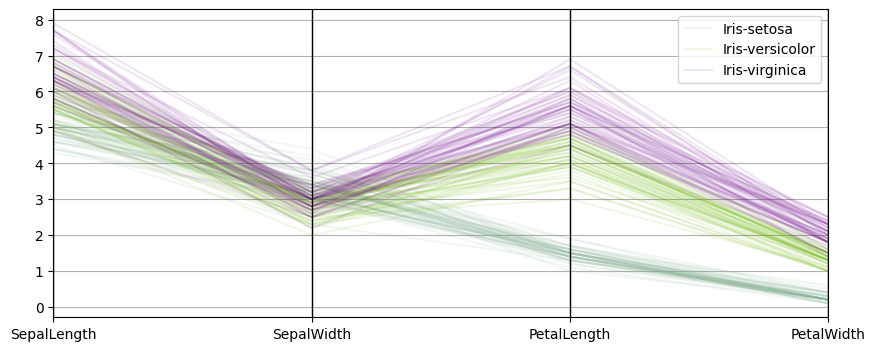

In [ ]:
pd.plotting.parallel_coordinates(df, class_column='Name',
                                 cols=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"],
                                 alpha=0.1)

# ¿Eso es todo?

**No**. A continuación dejamos links que podrían ser útiles para descubrir más tipos de gráficos y su posible implementación en código:

- Pandas Visualization (https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html): Lista de gráficos que provee la librería pandas.

- Seaborn Examples (https://seaborn.pydata.org/examples/index.html): Ejemplos de gráficos realizados con seaborn, junto a su código.

- Matplotlib Gallery (https://matplotlib.org/stable/gallery/index.html): Galería de ejemplos de gráficos realizados en matplotlib, junto a su código.

- Dataviz Catalogue (https://datavizcatalogue.com/): Catálogo de diferentes tipos de visualizaciones, junto a su explicación de para qué sirven.

- Python Graph Gallery (https://www.python-graph-gallery.com): Catálogo de diferentes tipos de visualizaciones, junto a una breve explicación y código para realizarlos (ojo que algunos pueden estar programados en librerías de python no vistas en el curso).

Adicionalmente, existen muchas librerías que no se vieron en el curso. Algunas son:

- Plotly (https://plotly.com/python/).
- Bokeh (https://docs.bokeh.org/en/latest/docs/gallery.html).
- Yellowbrick (https://www.scikit-yb.org/en/latest/gallery.html).


¿Y solo Python? ¿no hay más?  Si, hay librerías para muchos lenguajes más. Si desean hacer páginas web, tal vez necesitaran librerías para Javascript como:

- D3.js (https://observablehq.com/@d3/gallery).
- AnyChart.js (https://www.anychart.com/).